In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

from math import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# Parse CSV
data = np.genfromtxt('./diabetes.csv', delimiter=',')
data = np.delete(data, 0, axis=0)
labels = data[:, -1]
data = np.delete(data, -1, axis=1)

print(np.shape(data))
print(np.shape(labels))

print("Sample data: {}".format(data[:3]))
print("Sample labels: {}".format(labels[:3]))

(768, 8)
(768,)
Sample data: [[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
Sample labels: [1. 0. 1.]


In [3]:
# Preprocess Data
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

encoder = OneHotEncoder(sparse=False)

x_train, x_test, y_train, y_test = train_test_split(data_norm, labels, test_size=0.20)
y_train_enc = encoder.fit_transform(y_train.reshape(-1,1))
y_test_enc = encoder.fit_transform(y_test.reshape(-1,1))
class_names = ['Has Diabetes', 'No Diabetes']

print("Sample train data: {}".format(x_train[:1]))
print("Sample train labels: {}".format(y_train_enc[:1]))

Sample train data: [[0.         0.86934673 0.63934426 0.32323232 0.31323877 0.69299553
  0.46157131 0.61666667]]
Sample train labels: [[1. 0.]]


Final test set loss: 0.516765
Final test set accuracy: 0.792208
              precision    recall  f1-score   support

Has Diabetes       0.81      0.88      0.84        98
 No Diabetes       0.75      0.64      0.69        56

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



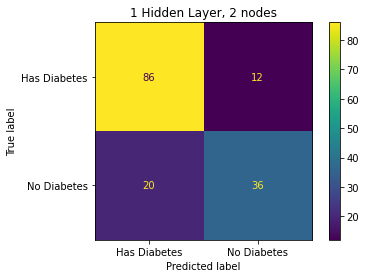

In [57]:
mlp = keras.models.Sequential()

mlp.add(Dense(2, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]

mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("1 Hidden Layer, 2 nodes")
plt.show()

Final test set loss: 0.522517
Final test set accuracy: 0.785714
              precision    recall  f1-score   support

Has Diabetes       0.80      0.88      0.84        98
 No Diabetes       0.74      0.62      0.68        56

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



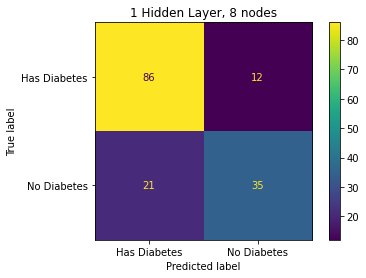

In [38]:
mlp = keras.models.Sequential()

mlp.add(Dense(8, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("1 Hidden Layer, 8 nodes")
plt.show()

Epoch 00220: early stopping
Final test set loss: 0.514183
Final test set accuracy: 0.785714
              precision    recall  f1-score   support

Has Diabetes       0.81      0.87      0.84        98
 No Diabetes       0.73      0.64      0.69        56

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



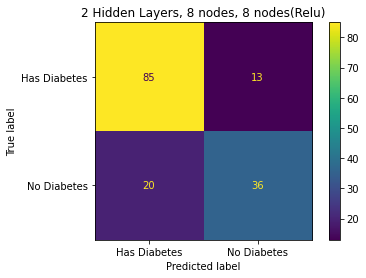

In [39]:
mlp = keras.models.Sequential()

mlp.add(Dense(8, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(8, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 8 nodes, 8 nodes(Relu)")
plt.show()

Final test set loss: 0.511777
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

Has Diabetes       0.80      0.88      0.83        98
 No Diabetes       0.74      0.61      0.67        56

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



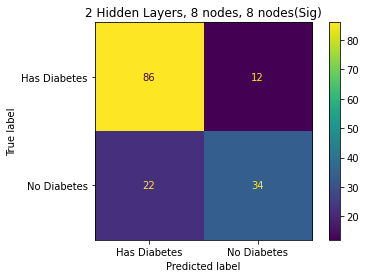

In [40]:
mlp = keras.models.Sequential()

mlp.add(Dense(8, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(8, activation='sigmoid', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 8 nodes, 8 nodes(Sig)")
plt.show()

Final test set loss: 0.519346
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

Has Diabetes       0.80      0.88      0.83        98
 No Diabetes       0.74      0.61      0.67        56

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



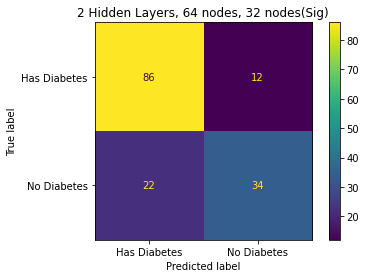

In [41]:
mlp = keras.models.Sequential()

mlp.add(Dense(64, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(32, activation='sigmoid', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 64 nodes, 32 nodes(Sig)")
plt.show()

Epoch 00194: early stopping
Final test set loss: 0.513979
Final test set accuracy: 0.772727
              precision    recall  f1-score   support

Has Diabetes       0.79      0.88      0.83        98
 No Diabetes       0.73      0.59      0.65        56

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



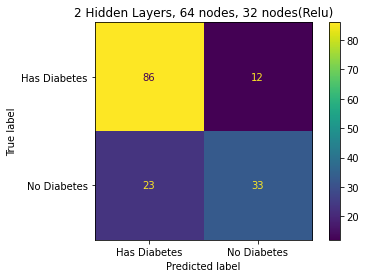

In [42]:
mlp = keras.models.Sequential()

mlp.add(Dense(64, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(32, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 64 nodes, 32 nodes(Relu)")
plt.show()

Epoch 00116: early stopping
Final test set loss: 0.530554
Final test set accuracy: 0.772727
              precision    recall  f1-score   support

Has Diabetes       0.81      0.84      0.82        98
 No Diabetes       0.70      0.66      0.68        56

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



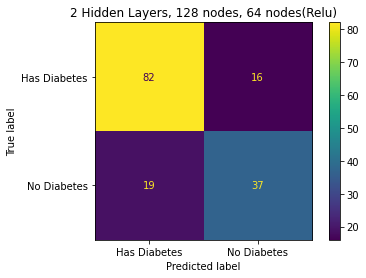

In [43]:
mlp = keras.models.Sequential()

mlp.add(Dense(128, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(64, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 128 nodes, 64 nodes(Relu)")
plt.show()

Epoch 00175: early stopping
Final test set loss: 0.547209
Final test set accuracy: 0.759740
              precision    recall  f1-score   support

Has Diabetes       0.81      0.81      0.81        98
 No Diabetes       0.67      0.68      0.67        56

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



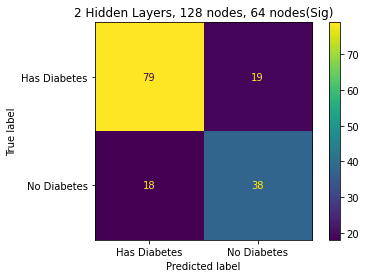

In [44]:
mlp = keras.models.Sequential()

mlp.add(Dense(128, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(64, activation='sigmoid', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 128 nodes, 64 nodes(Sig)")
plt.show()

Epoch 00196: early stopping
Final test set loss: 0.532777
Final test set accuracy: 0.785714
              precision    recall  f1-score   support

Has Diabetes       0.81      0.87      0.84        98
 No Diabetes       0.73      0.64      0.69        56

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



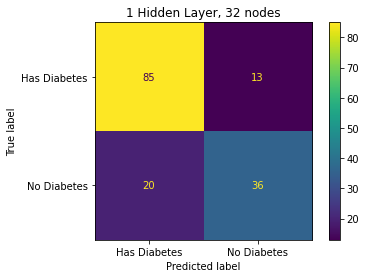

In [45]:
mlp = keras.models.Sequential()

mlp.add(Dense(32, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("1 Hidden Layer, 32 nodes")
plt.show()

Epoch 00167: early stopping
Final test set loss: 0.533135
Final test set accuracy: 0.766234
              precision    recall  f1-score   support

Has Diabetes       0.78      0.88      0.83        98
 No Diabetes       0.73      0.57      0.64        56

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



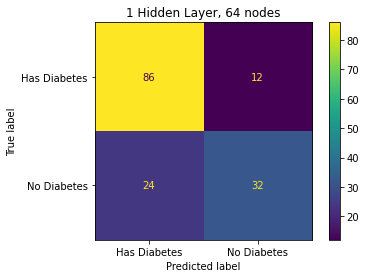

In [46]:
mlp = keras.models.Sequential()

mlp.add(Dense(64, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("1 Hidden Layer, 64 nodes")
plt.show()

Epoch 00348: early stopping
Final test set loss: 0.531485
Final test set accuracy: 0.772727
              precision    recall  f1-score   support

Has Diabetes       0.79      0.88      0.83        98
 No Diabetes       0.73      0.59      0.65        56

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



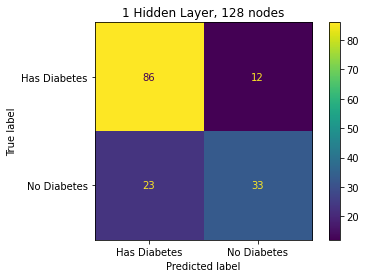

In [47]:
mlp = keras.models.Sequential()

mlp.add(Dense(128, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("1 Hidden Layer, 128 nodes")
plt.show()

Epoch 00199: early stopping
Final test set loss: 0.520495
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

Has Diabetes       0.80      0.87      0.83        98
 No Diabetes       0.73      0.62      0.67        56

    accuracy                           0.78       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



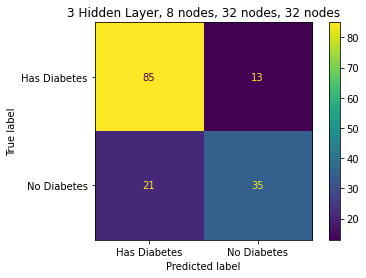

In [68]:
mlp = keras.models.Sequential()

mlp.add(Dense(32, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(32, activation='sigmoid', name='hidden1'))
mlp.add(Dense(32, activation='sigmoid', name='hidden2'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("3 Hidden Layer, 8 nodes, 32 nodes, 32 nodes")
plt.show()

Epoch 00188: early stopping
Final test set loss: 0.515687
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

Has Diabetes       0.80      0.87      0.83        98
 No Diabetes       0.73      0.62      0.67        56

    accuracy                           0.78       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



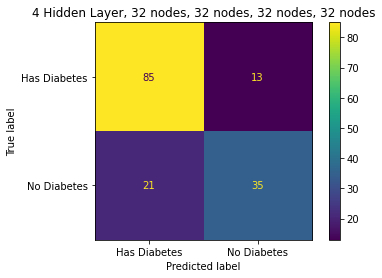

In [55]:
mlp = keras.models.Sequential()

mlp.add(Dense(32, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(32, activation='sigmoid', name='hidden1'))
mlp.add(Dense(32, activation='sigmoid', name='hidden2'))
mlp.add(Dense(32, activation='sigmoid', name='hidden3'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("4 Hidden Layer, 32 nodes, 32 nodes, 32 nodes, 32 nodes")
plt.show()

Final test set loss: 0.507455
Final test set accuracy: 0.772727
              precision    recall  f1-score   support

Has Diabetes       0.79      0.87      0.83        98
 No Diabetes       0.72      0.61      0.66        56

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



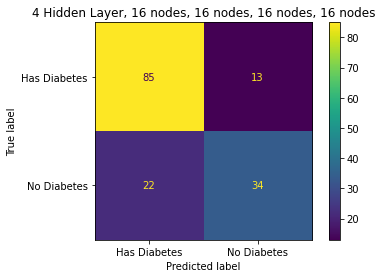

In [56]:
mlp = keras.models.Sequential()

mlp.add(Dense(16, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(16, activation='sigmoid', name='hidden1'))
mlp.add(Dense(16, activation='sigmoid', name='hidden2'))
mlp.add(Dense(16, activation='sigmoid', name='hidden3'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("4 Hidden Layer, 16 nodes, 16 nodes, 16 nodes, 16 nodes")
plt.show()

Final test set loss: 0.523026
Final test set accuracy: 0.772727
              precision    recall  f1-score   support

Has Diabetes       0.78      0.90      0.83        98
 No Diabetes       0.76      0.55      0.64        56

    accuracy                           0.77       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154



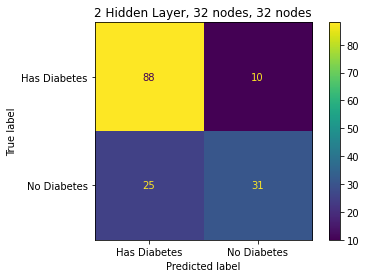

In [51]:
mlp = keras.models.Sequential()

mlp.add(Dense(32, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(32, activation='sigmoid', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layer, 32 nodes, 32 nodes")
plt.show()

Final test set loss: 0.513746
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

Has Diabetes       0.79      0.89      0.84        98
 No Diabetes       0.75      0.59      0.66        56

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



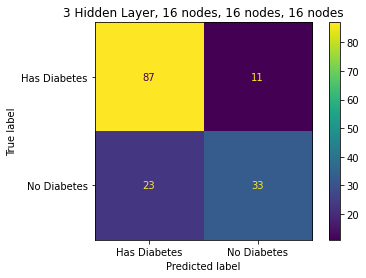

In [52]:
mlp = keras.models.Sequential()

mlp.add(Dense(16, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(16, activation='sigmoid', name='hidden1'))
mlp.add(Dense(16, activation='sigmoid', name='hidden2'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("3 Hidden Layer, 16 nodes, 16 nodes, 16 nodes")
plt.show()

Epoch 00253: early stopping
Final test set loss: 0.532711
Final test set accuracy: 0.759740
              precision    recall  f1-score   support

Has Diabetes       0.77      0.90      0.83        98
 No Diabetes       0.74      0.52      0.61        56

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



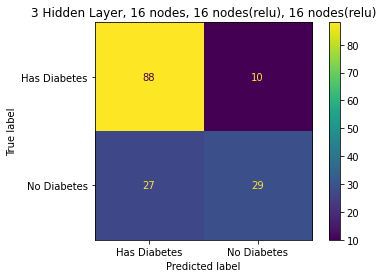

In [53]:
mlp = keras.models.Sequential()

mlp.add(Dense(16, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(16, activation='relu', name='hidden1'))
mlp.add(Dense(16, activation='relu', name='hidden2'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("3 Hidden Layer, 16 nodes, 16 nodes(relu), 16 nodes(relu)")
plt.show()

Epoch 00441: early stopping
Final test set loss: 0.510770
Final test set accuracy: 0.792208
              precision    recall  f1-score   support

Has Diabetes       0.81      0.89      0.84        98
 No Diabetes       0.76      0.62      0.69        56

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



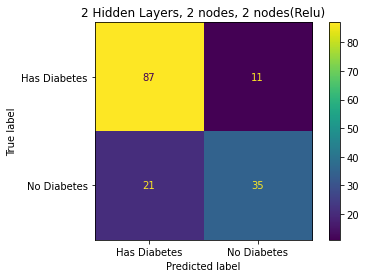

In [64]:
mlp = keras.models.Sequential()

mlp.add(Dense(2, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='relu', name='hidden1'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("2 Hidden Layers, 2 nodes, 2 nodes(Relu)")
plt.show()

Epoch 00499: early stopping
Final test set loss: 0.511877
Final test set accuracy: 0.779221
              precision    recall  f1-score   support

Has Diabetes       0.80      0.87      0.83        98
 No Diabetes       0.73      0.62      0.67        56

    accuracy                           0.78       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



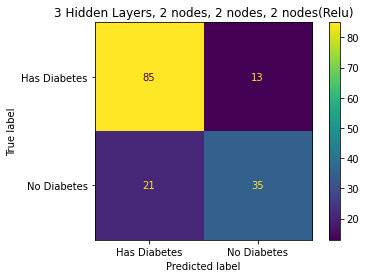

In [72]:
mlp = keras.models.Sequential()

mlp.add(Dense(2, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(2, activation='sigmoid', name='hidden1'))
mlp.add(Dense(2, activation='relu', name='hidden2'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("3 Hidden Layers, 2 nodes, 2 nodes, 2 nodes(Relu)")
plt.show()

Epoch 00162: early stopping
Final test set loss: 0.528068
Final test set accuracy: 0.766234
              precision    recall  f1-score   support

Has Diabetes       0.77      0.90      0.83        98
 No Diabetes       0.75      0.54      0.63        56

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



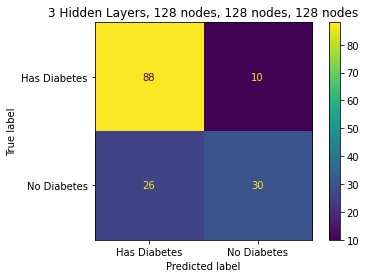

In [74]:
mlp = keras.models.Sequential()

mlp.add(Dense(128, activation="sigmoid", input_shape=(8,)))
mlp.add(Dense(128, activation='sigmoid', name='hidden1'))
mlp.add(Dense(128, activation='sigmoid', name='hidden2'))
mlp.add(Dense(2, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0.0001,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=50,
        verbose=1,
    )
]
mlp.fit(x_train, y_train_enc, verbose=0, batch_size=5, epochs=500, validation_split=0.2, callbacks=callbacks)
results = mlp.evaluate(x_test, y_test_enc, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
print(classification_report(y_test, class_results, target_names=class_names))

disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()
plt.title("3 Hidden Layers, 128 nodes, 128 nodes, 128 nodes")
plt.show()